# Loan Application Status Prediction

## Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the dataset

dfl=pd.read_csv('loan_prediction.csv')
dfl

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis(EDA)

In [3]:
#Checking the top 5 rows
dfl.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Checking the bottom 5 rows
dfl.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# Checking the random sample data

dfl.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
321,LP002053,Male,Yes,3+,Graduate,No,4342,189.0,124.0,360.0,1.0,Semiurban,Y
65,LP001225,Male,Yes,0,Graduate,No,5726,4595.0,258.0,360.0,1.0,Semiurban,N
324,LP002065,Male,Yes,3+,Graduate,No,15000,0.0,300.0,360.0,1.0,Rural,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
243,LP001807,Male,Yes,2,Graduate,Yes,6250,1300.0,108.0,360.0,1.0,Rural,Y


In [6]:
#Checking the datatypes
dfl.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

there ara 8 object data type, 4 float data type and 1 integer data type

In [7]:
#Checking the data information
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
#Checking the data unique value

dfl.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
# Checking the gender count

dfl['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

There are 489 male and Female 112. Male count is high as compared to female.

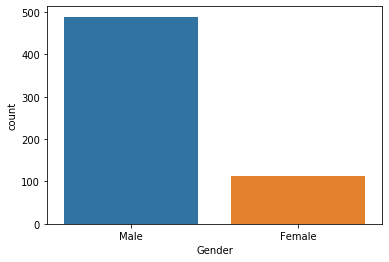

In [10]:
sns.countplot(dfl['Gender'])
plt.show()

In [11]:
# Checking to know the applicant is Married or not.

dfl['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

There 398 Applicant are married and 213 Applicant are not married

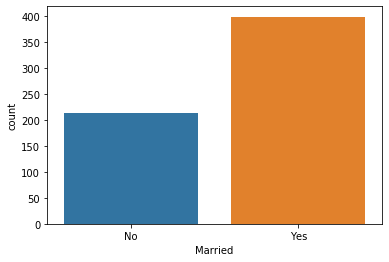

In [12]:
sns.countplot(dfl['Married'])
plt.show()

In [13]:
# Checking the column names

dfl.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
#Checking the count of each columns in the data set
for i in dfl.columns:
    print(dfl[i].value_counts())
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    

LP001508    1
LP001256    1
LP001807    1
LP002731    1
LP002315    1
           ..
LP001864    1
LP002936    1
LP002209    1
LP002277    1
LP002723    1
Name: Loan_ID, Length: 614, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Male      489
Female    112
Name: Gender, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Yes    398
No     213
Name: Married, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
No     500
Yes     82
Name: Self_Employed, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Leng

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


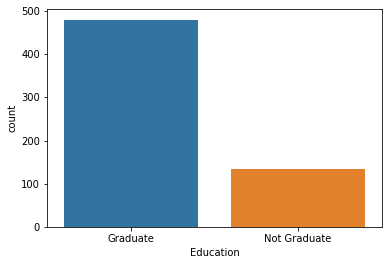

In [15]:
# Checking to know the applicant is graduate or not

print(dfl['Education'].value_counts())
sns.countplot(dfl['Education'])
plt.show()


There are 480 Applicant are graduate and the rest 134 Applicant are not graduate

In [16]:
# Checking the categorical data

categorical_data=[]
for i in dfl.dtypes.index:
    if dfl.dtypes[i]=='object':
        categorical_data.append(i)
print("This are Categorical data:\n")
print(categorical_data)

This are Categorical data:

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [17]:
# Checking the Numerical data

numerical_data=[]
for i in dfl.dtypes.index:
    if dfl.dtypes[i]!='object':
        numerical_data.append(i)
print("This are Numerical data:\n")     
print(numerical_data)

This are Numerical data:

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [18]:
# Checking the null value

dfl.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
dfl.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing value in most of the columns

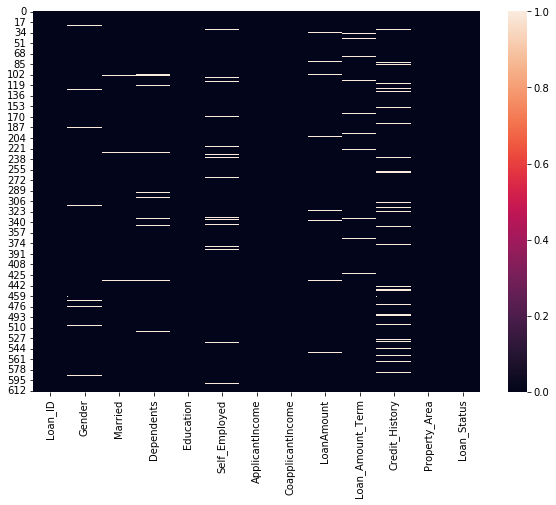

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(dfl.isnull())
plt.show()

In [21]:
# Replace the null value with median if it is numerical data and replace with mode if it is categorical data


dfl['Gender']=dfl['Gender'].fillna(dfl['Gender'].mode()[0])
dfl['Married']=dfl['Married'].fillna(dfl['Married'].mode()[0])
dfl['Dependents']=dfl['Dependents'].fillna(dfl['Dependents'].mode()[0])
dfl['Self_Employed']=dfl['Self_Employed'].fillna(dfl['Self_Employed'].mode()[0])
dfl['LoanAmount']=dfl['LoanAmount'].fillna(dfl['LoanAmount'].median())
dfl['Loan_Amount_Term']=dfl['Loan_Amount_Term'].fillna(dfl['Loan_Amount_Term'].median())
dfl['Credit_History']=dfl['Credit_History'].fillna(dfl['Credit_History'].median())

In [22]:
# Checking the null value after replacing with median and mode
dfl.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Hence we have removed all null value, there is no null value present in data

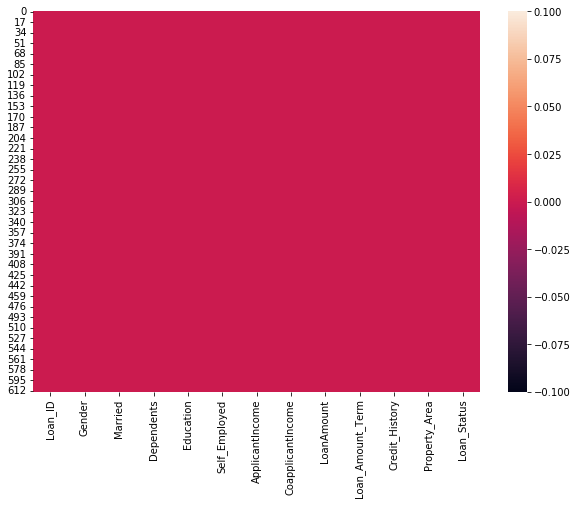

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(dfl.isnull())
plt.show()

In [24]:
#Checking the Statistical data
dfl.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [25]:
dfl.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001508,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In the Statistical Summary we see that all the count is 614, this means no null present.
Minimum Loan Amount is 9 and maximum is 700
Minimum Loan Amount Term is 12 and maximum Loan Amount Term is 480


In [26]:
#Checking the shape of data
dfl.shape

(614, 13)

There are 614 row and 13 columns

In [27]:
# Let's drop the Loan id column from data set, as it didn't contribute much

dfl=dfl.drop('Loan_ID',axis=1)
dfl.shape

(614, 12)

We have removed the Loan ID Column from dataset

Y    422
N    192
Name: Loan_Status, dtype: int64


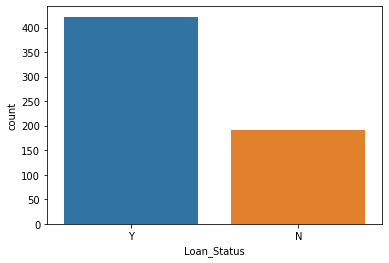

In [28]:
#Checking the Loan Status count
print(dfl['Loan_Status'].value_counts())
sns.countplot(dfl['Loan_Status'])
plt.show()

There are 422 Applicant Loan has been approved and 192 Applicant's Loan has been rejected.

In [29]:
# Checking the unique value of Self Employed
dfl['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

No     532
Yes     82
Name: Self_Employed, dtype: int64


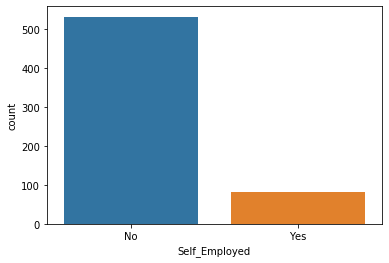

In [30]:
#Checking the count of self employed
print(dfl['Self_Employed'].value_counts())
sns.countplot(dfl['Self_Employed'])
plt.show()

There are 82 Applicants are self employed and 532 applicant are not self employed. We clearly see that more applicant are not self employed

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


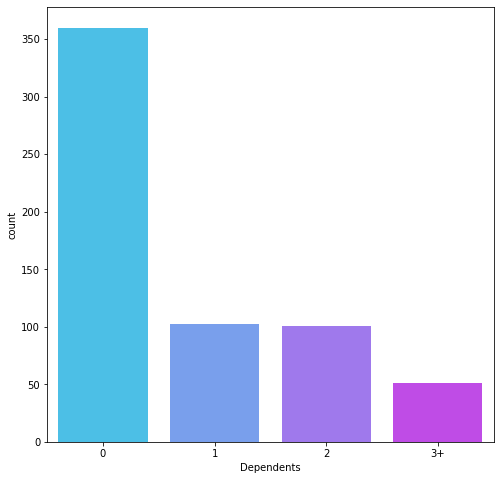

In [31]:
# Checking the count of  Dependent
plt.figure(figsize=(8,8))
print(dfl['Dependents'].value_counts())
sns.countplot(dfl['Dependents'],palette='cool')
plt.show()

*****************************Gender Count******************************************


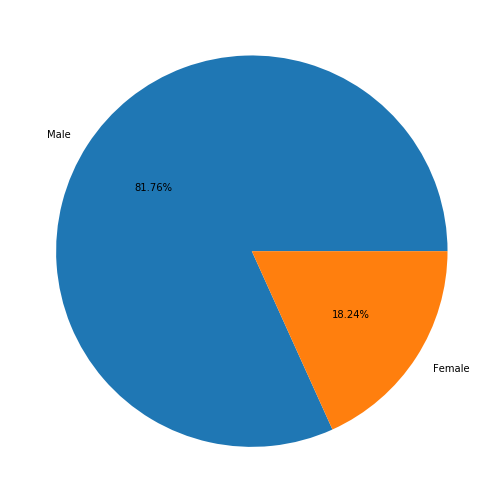

In [32]:
# Viewing the Gender using Piechart
labels=['Male','Female']
figure,axes=plt.subplots(figsize=(9,9))
axes.pie(dfl['Gender'].value_counts(),labels=labels,autopct='%1.2f%%')
print("*****************************Gender Count******************************************")
plt.show()

***************************************Loan Status*****************************************


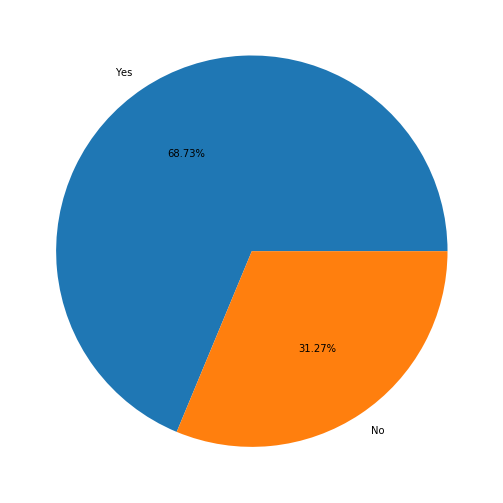

In [33]:
labels=['Yes','No']
figure,axes=plt.subplots(figsize=(9,9))
axes.pie(dfl['Loan_Status'].value_counts(),labels=labels,autopct='%1.2f%%')
print("***************************************Loan Status*****************************************")
plt.show()

1.0    525
0.0     89
Name: Credit_History, dtype: int64


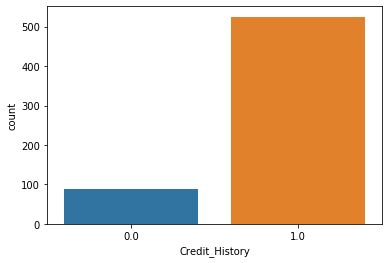

In [34]:
# Checking the Credit History Count
print(dfl['Credit_History'].value_counts())
sns.countplot(dfl['Credit_History'])
plt.show()

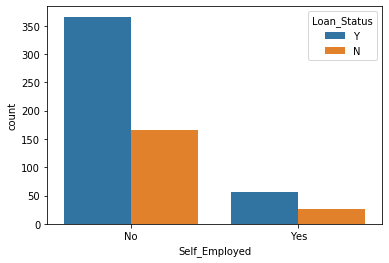

In [35]:
# Viewing Loan status based on Self Employed
sns.countplot(dfl['Self_Employed'],hue=dfl['Loan_Status'])
plt.show()

More applicant are not self employed. Those who are not self employed, there is any chance of getting loansm

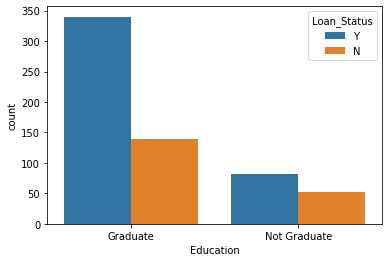

In [36]:
# Viewing the Loan Status based on Education
sns.countplot(dfl['Education'],hue=dfl['Loan_Status'])
plt.show()

The applicant's who are more educated, they are getting the loans

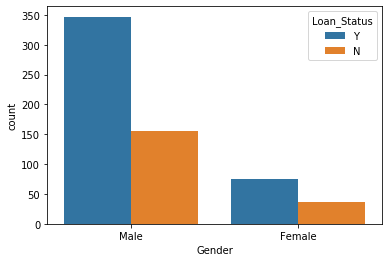

In [37]:
sns.countplot(dfl['Gender'],hue=dfl['Loan_Status'])
plt.show()

Male applicant are more, they have applied for Loan, there is a chance that male applicant are getting the loan

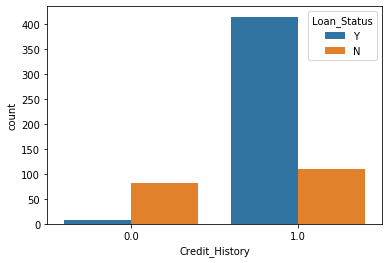

In [38]:
sns.countplot(dfl['Credit_History'],hue=dfl['Loan_Status'])
plt.show()

The applicant who are having 1.0 Credit are getting the Loan

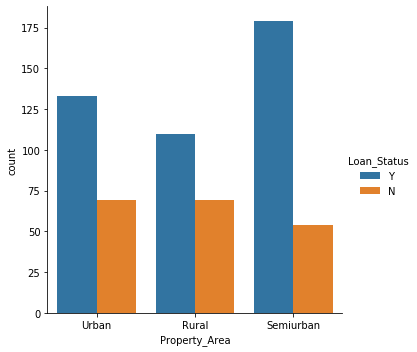

In [39]:
sns.factorplot('Property_Area',data=dfl,kind='count',hue='Loan_Status')
plt.show()

The applicant who are in Semiurban, there is a high chance of getting the loan

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


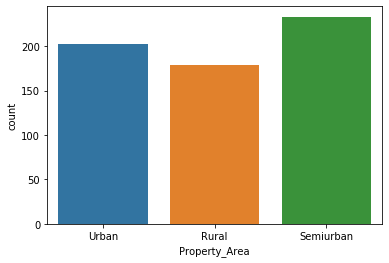

In [40]:
print(dfl['Property_Area'].value_counts())
sns.countplot(dfl['Property_Area'])
plt.show()

Lot's of Applicant are in Semiurban area.

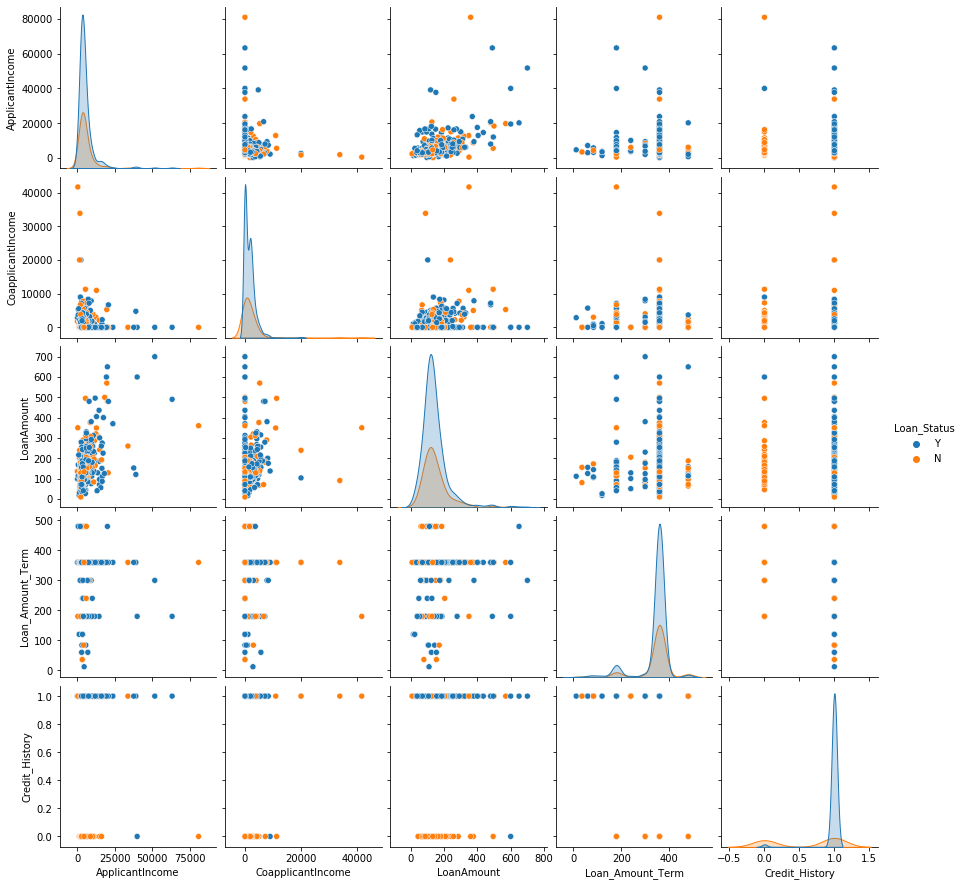

In [41]:
# Viewing the data using pairplot

sns.pairplot(dfl,hue='Loan_Status')

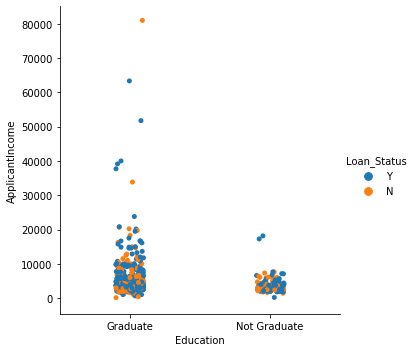

In [42]:
sns.catplot(x='Education',y='ApplicantIncome',hue='Loan_Status',data=dfl)
plt.show()

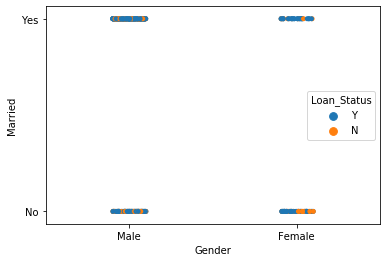

In [43]:
sns.stripplot(x='Gender',y='Married',data=dfl,hue='Loan_Status')
plt.show()

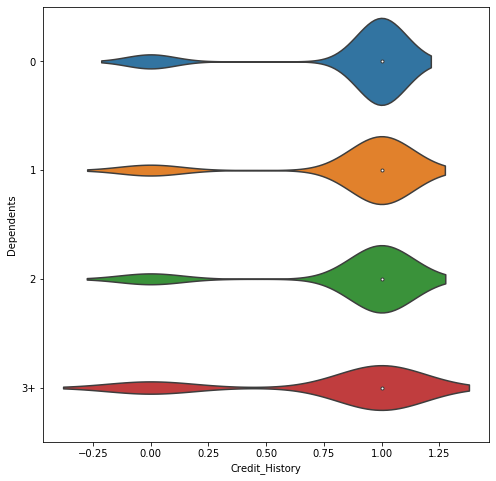

In [44]:
plt.figure(figsize=(8,8))
sns.violinplot(x='Credit_History',y='Dependents',data=dfl)
plt.show()

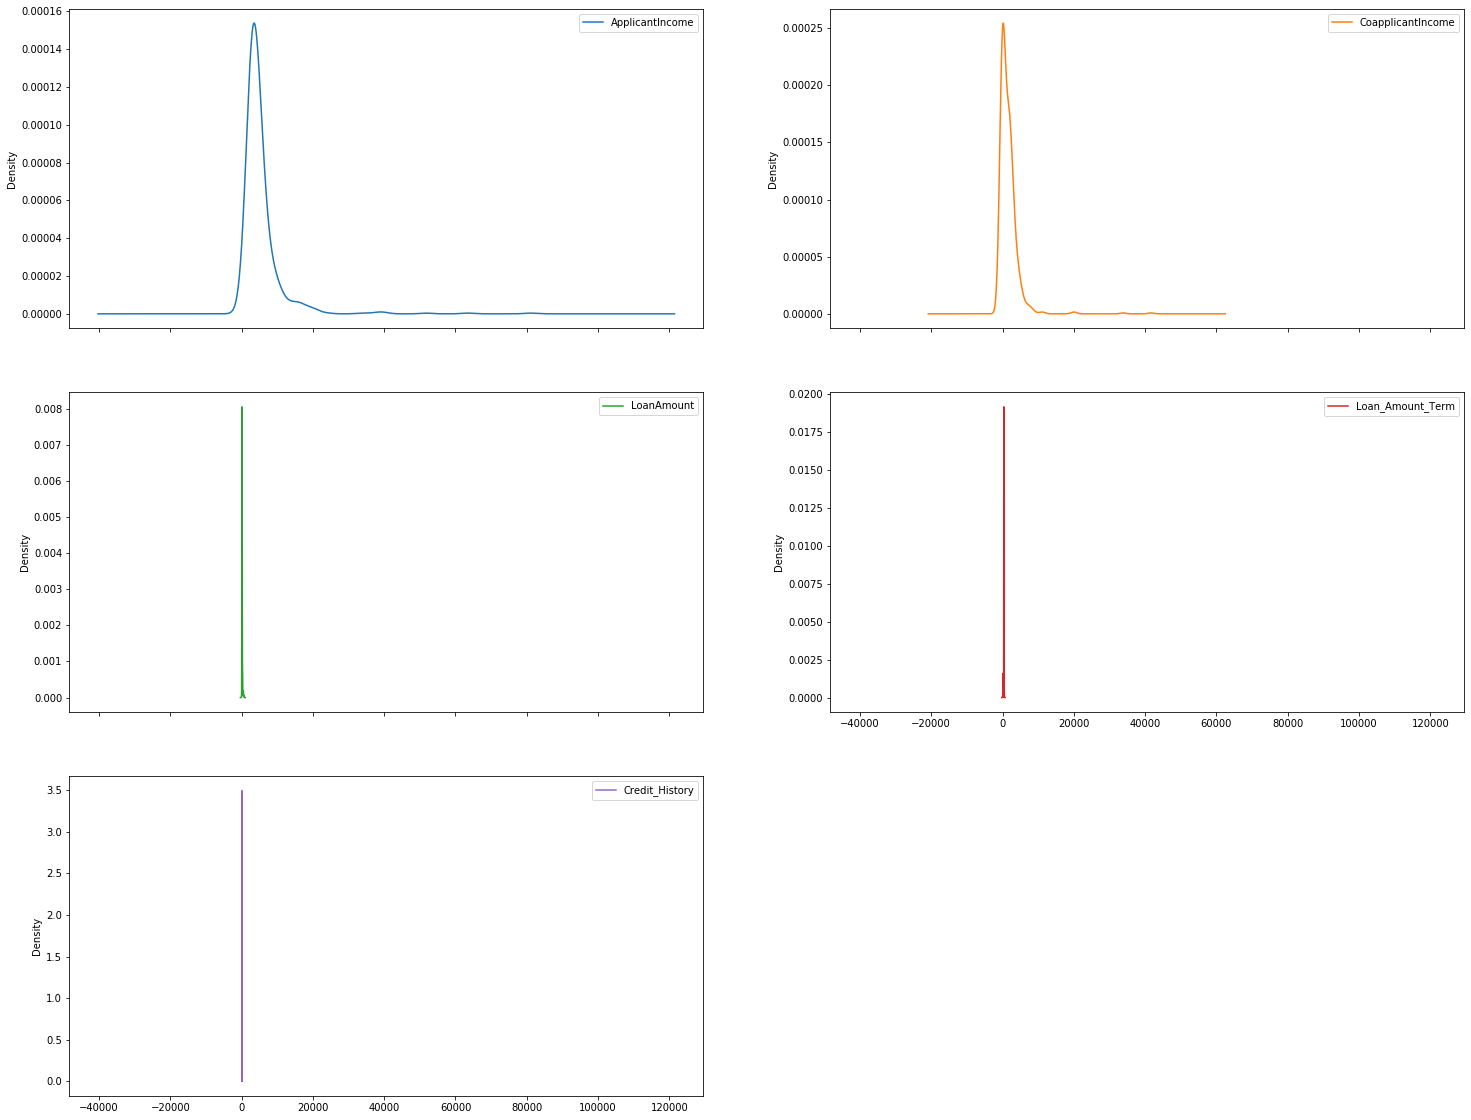

In [45]:
dfl.plot(kind='kde',subplots=True,layout=(3,2),figsize=(25,20))
plt.show()

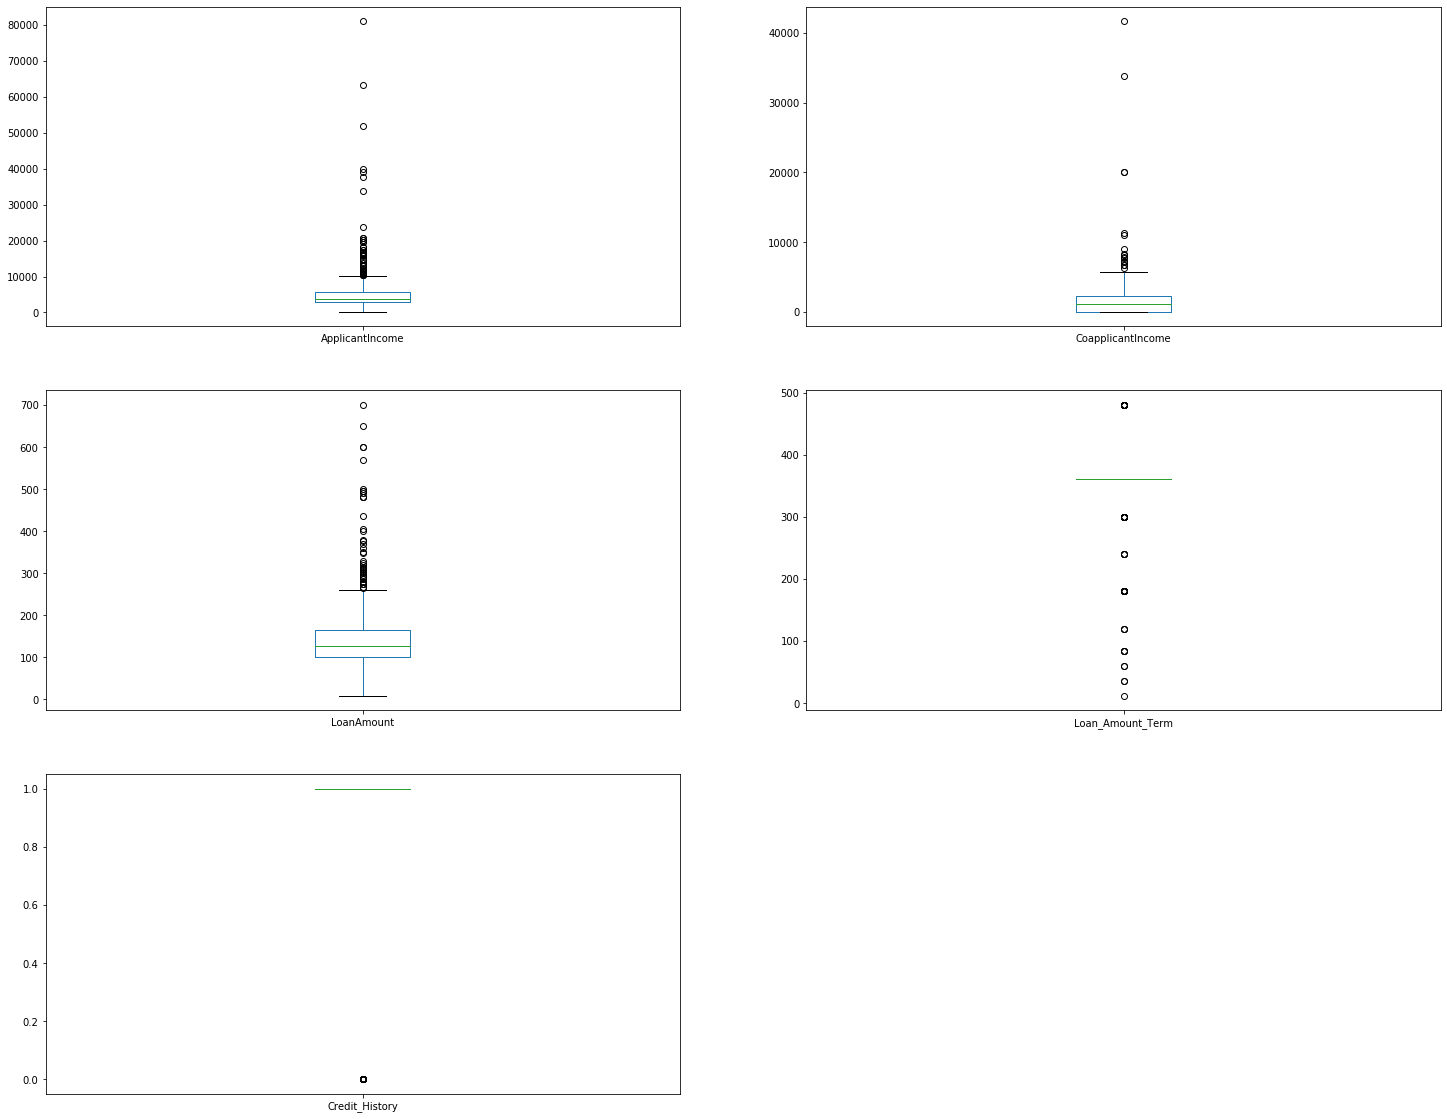

In [46]:
dfl.plot(kind='box',subplots=True,layout=(3,2),figsize=(25,20))
plt.show()

Outliers is present in all the columns

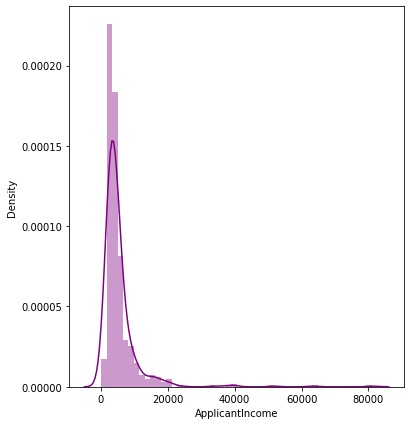

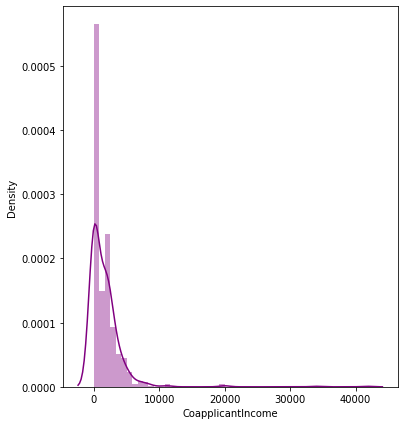

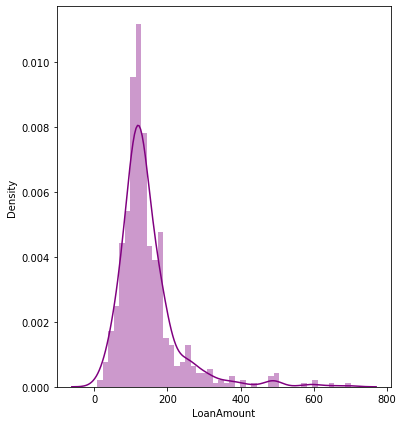

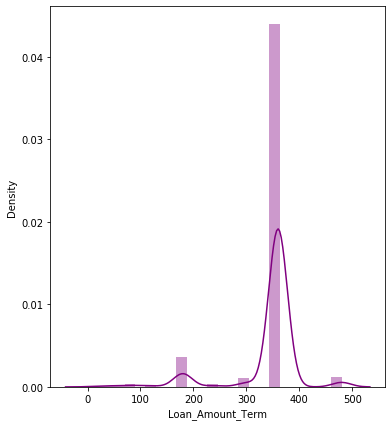

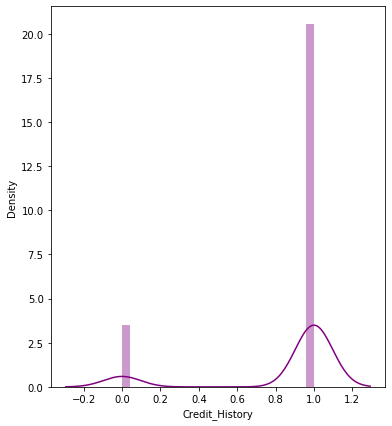

In [47]:
# Viewing the Numerical data using distribution plot
for i in dfl[numerical_data]:
    plt.figure(figsize=(6,7))
    sns.distplot(dfl[i],color='purple')
plt.show()

Skewness is present in data. The data is not normally distributed. Mean value is high in Applicant Income, Coapplicant Income as they right skewed.


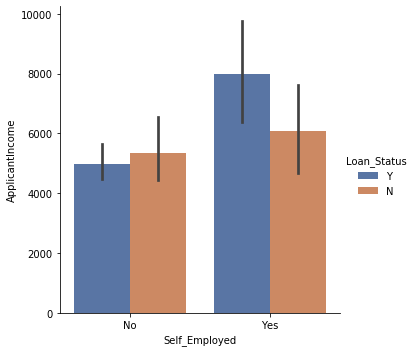

In [48]:
# Viewing the relationship of Self_Employed and Applicant Income based on Loan Status
sns.catplot(x='Self_Employed',y='ApplicantIncome',data=dfl,hue='Loan_Status', kind='bar',palette='deep')

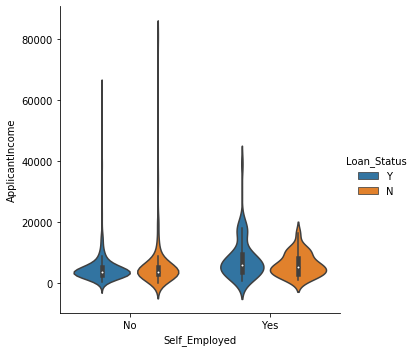

In [49]:
sns.catplot(x='Self_Employed',y='ApplicantIncome',data=dfl,hue='Loan_Status', kind='violin')
plt.show()

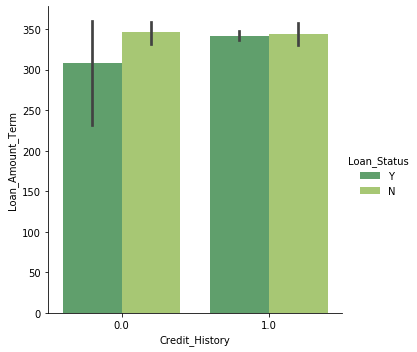

In [50]:
#Comparing the relationship between Credit History and Loan Amount Term based on Loan status
sns.catplot(x='Credit_History',y='Loan_Amount_Term', kind='bar',hue='Loan_Status',data=dfl,palette='summer')
plt.show()

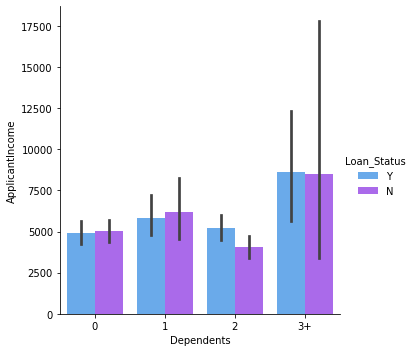

In [51]:
#Comparing the relationship between Dependents and Applicant Income based on Loan status
sns.catplot(x='Dependents',y='ApplicantIncome', kind='bar',hue='Loan_Status',data=dfl,palette='cool')
plt.show()

The Dependents 3+ are getting the loan and as also there is a chance of not gettign the loan

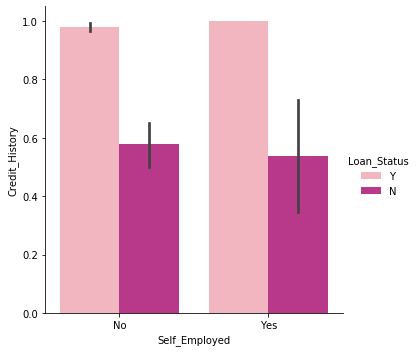

In [52]:
#Comparing the relationship between Self Employed and Credit History based on Loan Status.
sns.catplot(x='Self_Employed',y='Credit_History', kind='bar',hue='Loan_Status',data=dfl,palette='RdPu')
plt.show()

Those who are not self employeed and credit history is 1.0 are getting the loan.

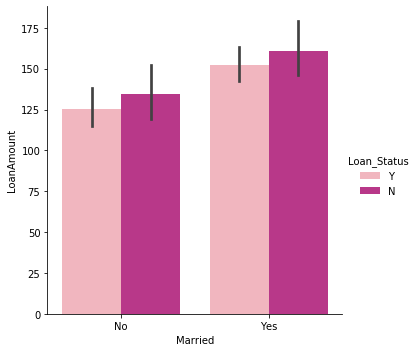

In [53]:
# Checking the relationship between Married and LoanAmount based on Loan Status
sns.catplot(x='Married',y='LoanAmount', kind='bar',hue='Loan_Status',data=dfl,palette='RdPu')
plt.show()

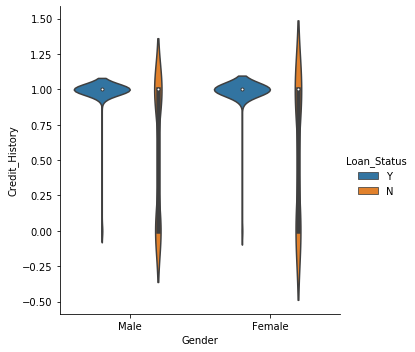

In [54]:
sns.catplot(x='Gender',y='Credit_History',data=dfl,kind='violin',hue='Loan_Status')

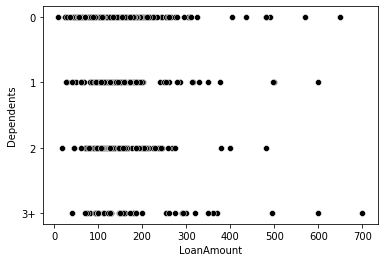

In [55]:
sns.scatterplot(x='LoanAmount',y='Dependents',data=dfl,color='black')

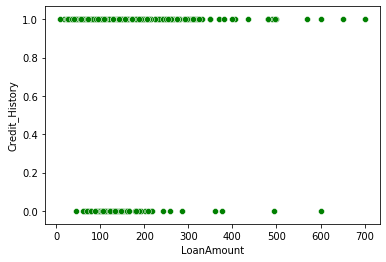

In [56]:
sns.scatterplot(x='LoanAmount',y='Credit_History',data=dfl,color='green')
plt.show()

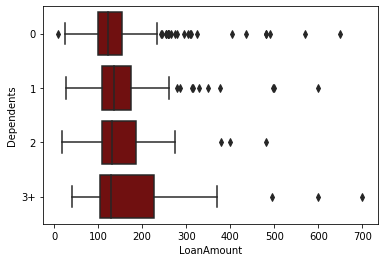

In [57]:
sns.boxplot(x='LoanAmount',y='Dependents',data=dfl,color='maroon')

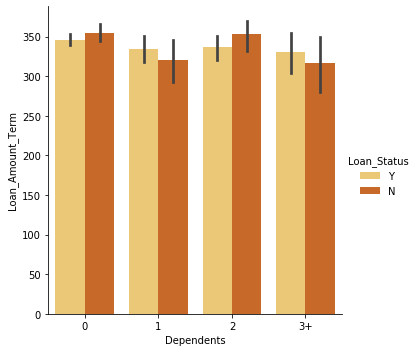

In [58]:
# Checking the relationship between Dependents and Loan_Amount_Term based on Loan Status
sns.catplot(x='Dependents',y='Loan_Amount_Term', kind='bar',hue='Loan_Status',data=dfl,palette='YlOrBr')
plt.show()

# Outliers

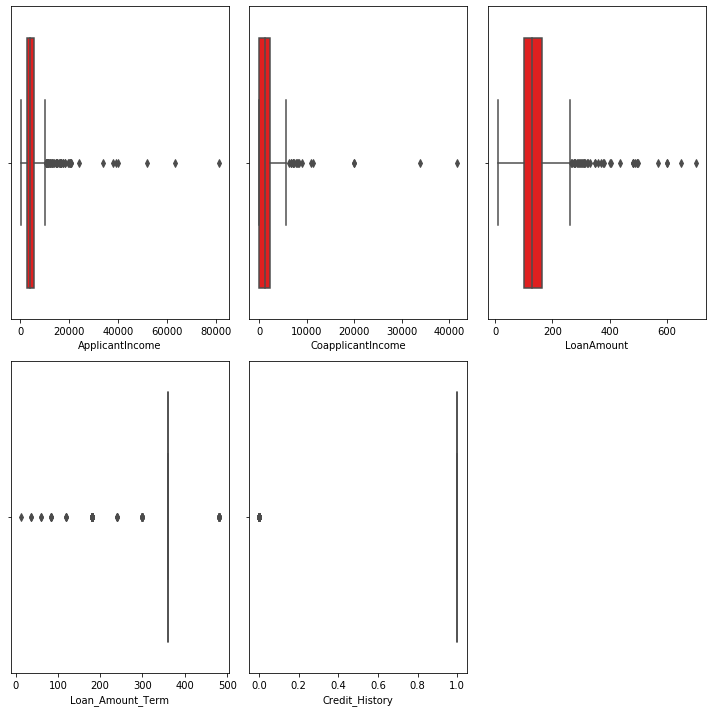

In [59]:
# Checking the Outliers
plt.figure(figsize=(10,10))
plotnumber=1
for i in numerical_data:
    if plotnumber<=9:
        plt.subplot(2,3,plotnumber)
        sns.boxplot(dfl[i],color='red')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()

Outliers are presents in all the columns. Let's remove them using ZScore method. In Credit History only 2 value is present, we don't any outliers are there, so we can ignore the Credit_History

In [60]:
dfl.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [61]:
outliers=dfl[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

In [62]:
from scipy.stats import zscore

z=np.abs(zscore(outliers))
z

array([[0.07299082, 0.55448733, 0.21124125, 0.2732313 ],
       [0.13441195, 0.03873155, 0.21124125, 0.2732313 ],
       [0.39374734, 0.55448733, 0.94899647, 0.2732313 ],
       ...,
       [0.43717437, 0.47240418, 1.27616847, 0.2732313 ],
       [0.35706382, 0.55448733, 0.49081614, 0.2732313 ],
       [0.13441195, 0.55448733, 0.15174486, 0.2732313 ]])

In [63]:
dfl_new=dfl[(z<3).all(axis=1)]
dfl_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [64]:
dfl.shape

(614, 12)

there are 614 rows and 12 columns before removing the outliers

In [65]:
dfl_new.shape

(577, 12)

there are 577 rows and 12 columns after removal of outliers

In [66]:
data_loss=((614-577)/614)*100
data_loss

6.026058631921824

6% of data is removed in the Outliers removal process

# Skewness

In [67]:
dfl_new.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

We are considering the skewness which is more than -0.5/0.5.
Skewness is present in all the columns in the data.

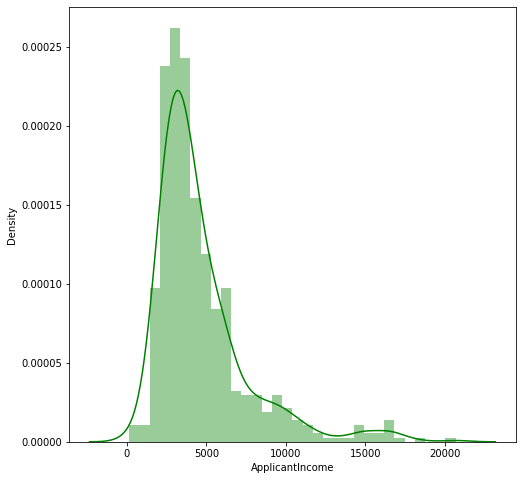

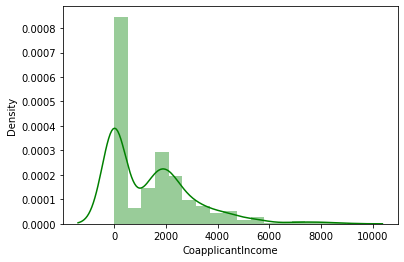

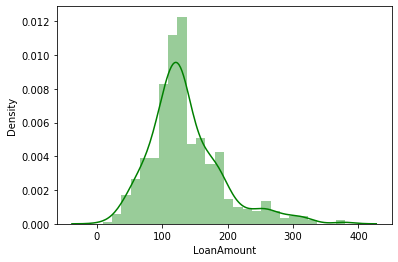

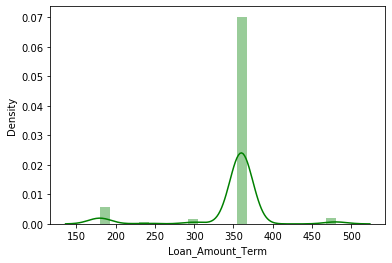

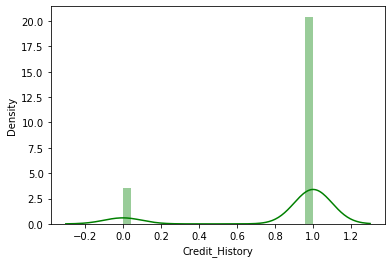

In [68]:
# Checking the skewness data before removing the skewness
plt.figure(figsize=(8,8))
for i in dfl_new[numerical_data]:
    sns.distplot(dfl_new[i],color='green')
    plt.show()

# Skewness removal using Power Transformer

In [69]:
from sklearn.preprocessing import PowerTransformer

In [70]:
skewed=['ApplicantIncome','CoapplicantIncome','LoanAmount']

scaled=PowerTransformer(method='yeo-johnson')
print(scaled)

PowerTransformer()


In [71]:
dfl_new[skewed]=scaled.fit_transform(dfl_new[skewed].values)
dfl_new[skewed]

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260
...,...,...,...
609,-0.587375,-1.122446,-1.293791
610,0.035386,-1.122446,-2.332692
611,1.281658,0.173344,1.845015
612,1.164426,-1.122446,0.976055


In [72]:
dfl_new.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

Hence we have removed the Skewness

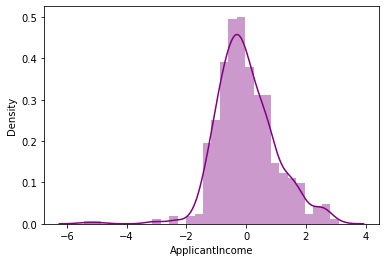

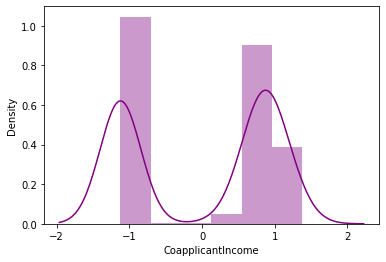

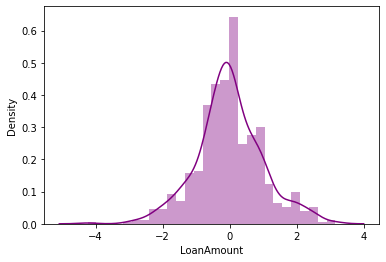

In [73]:
# Viewing the data after skewness removed
for i in dfl_new[skewed]:
    sns.distplot(dfl_new[i],color='Purple')
    plt.show()

# Correlation

In [74]:
dfl_new_corr=dfl_new.corr()
dfl_new_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.360946,0.432154,-0.069429,0.028825
CoapplicantIncome,-0.360946,1.000000,0.200081,0.000951,0.006564
LoanAmount,0.432154,0.200081,1.000000,0.049057,-0.003626
Loan_Amount_Term,-0.069429,0.000951,0.049057,1.000000,0.027392
Credit_History,0.028825,0.006564,-0.003626,0.027392,1.000000


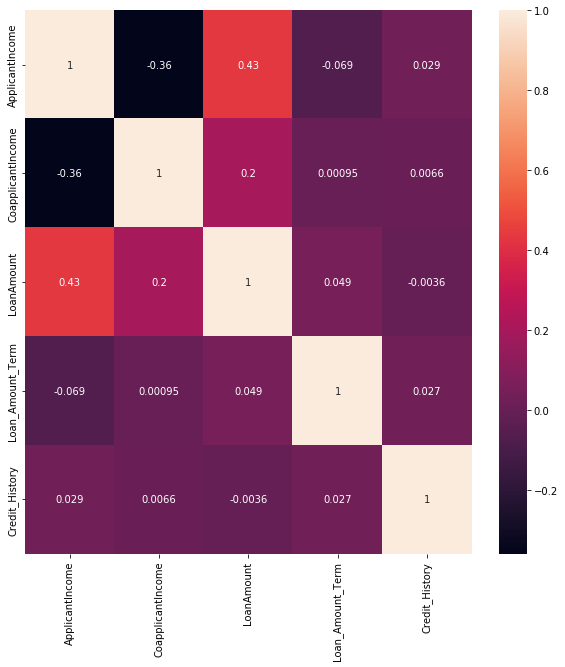

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(dfl_new.corr(),annot=True)
plt.show()

There is no high correlation, moderate level of correlation exist in data

# Coverting the categorical data to Numerical data using label encoder

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
dfl_new.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [78]:
categorical_data=['Gender','Married','Dependents','Education','Self_Employed']

In [79]:
le=LabelEncoder()
dfl_new[categorical_data]=dfl_new[categorical_data].apply(le.fit_transform)

In [80]:
cat_data=['Loan_Status']

In [81]:
dfl_new[cat_data]=dfl_new[cat_data].apply(le.fit_transform)

In [82]:
cat_data=['Property_Area']
dfl_new[cat_data]=dfl_new[cat_data].apply(le.fit_transform)

In [83]:
dfl_new.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

We have converted all the categorical data to numerical data

In [84]:
# Checking the correlation after conversion of categorical data to numerical data
dfl_new_corr=dfl_new.corr()
dfl_new_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


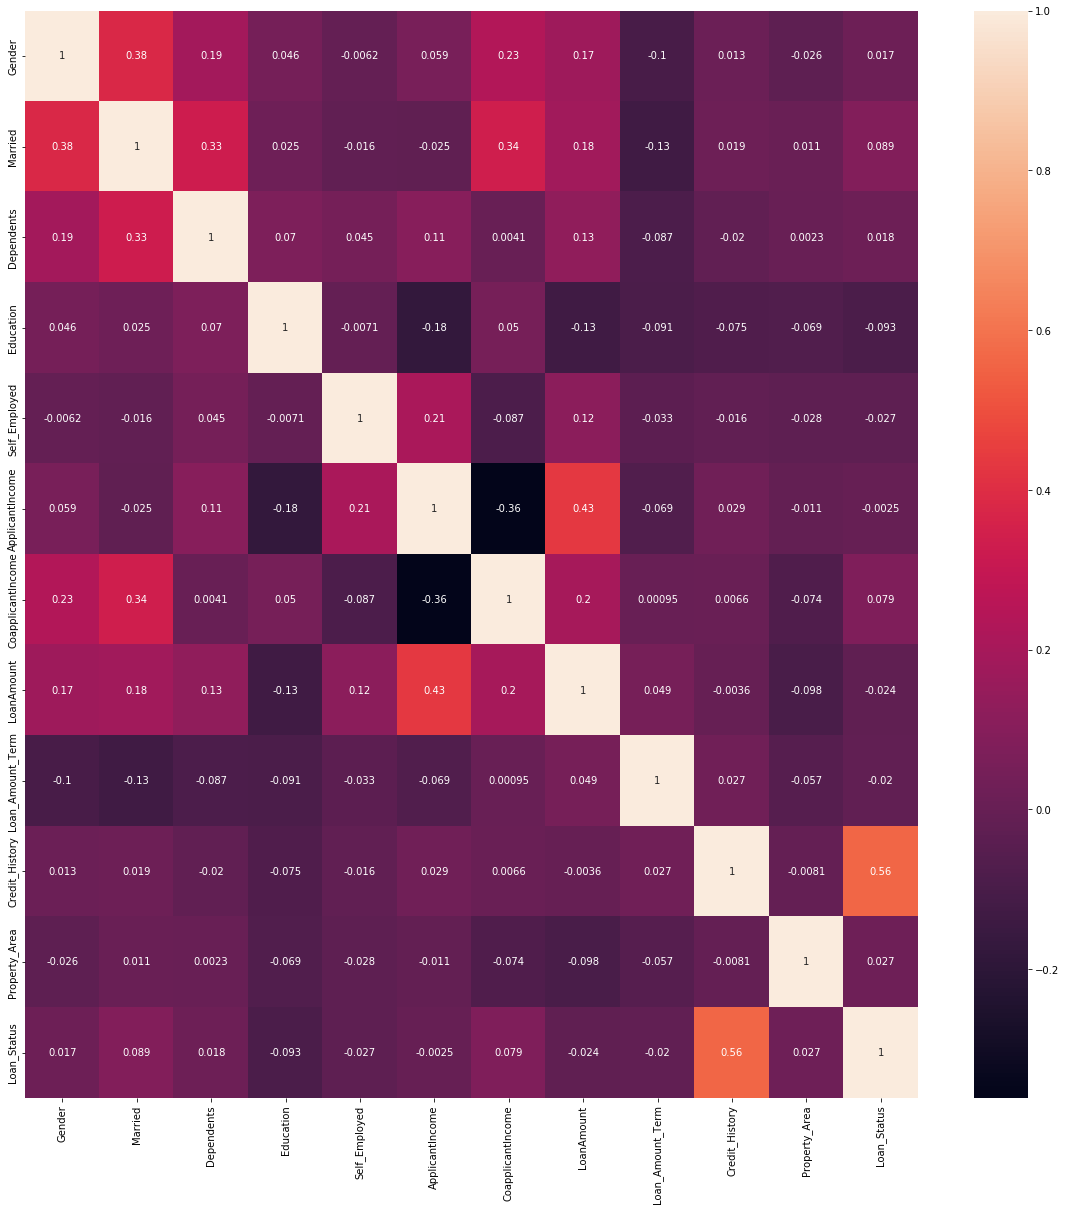

In [85]:
plt.figure(figsize=(20,20))
sns.heatmap(dfl_new.corr(),annot=True)
plt.show()

There is no muliticollinearity exist in the data, as there is no high correlation present

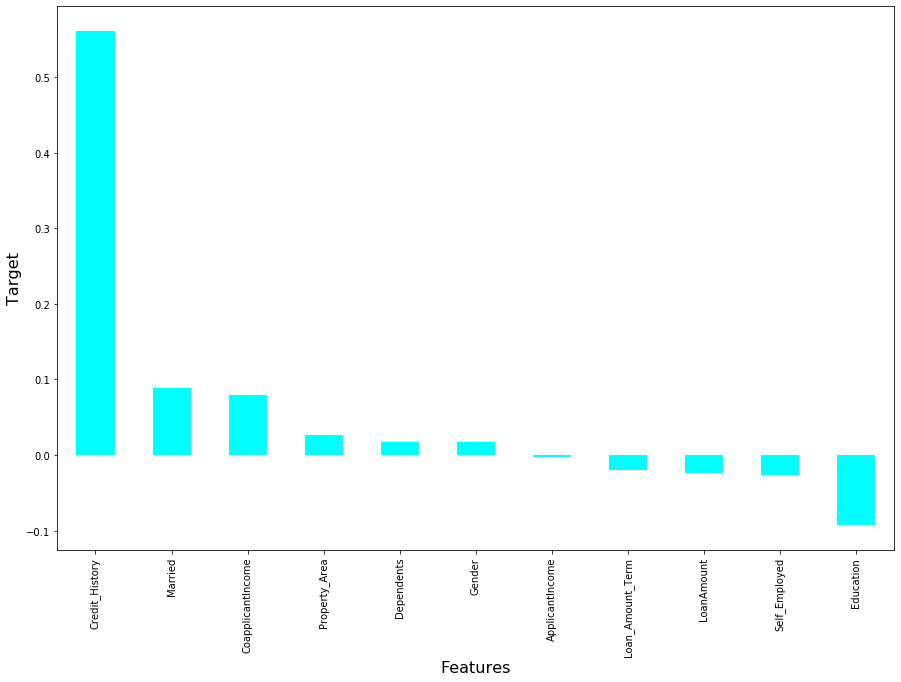

In [86]:
# Checking the correlation between the features using the bar plot
plt.figure(figsize=(15,10))
corr=dfl_new.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='aqua')
plt.xlabel("Features",fontsize=16)
plt.ylabel("Target",fontsize=16)
corr

# Splitting the data into x and y variable

In [87]:
x=dfl_new.drop('Loan_Status',axis=1)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.587375,-1.122446,-1.293791,360.0,1.0,0
610,1,1,3,0,0,0.035386,-1.122446,-2.332692,180.0,1.0,0
611,1,1,1,0,0,1.281658,0.173344,1.845015,360.0,1.0,2
612,1,1,2,0,0,1.164426,-1.122446,0.976055,360.0,1.0,2


In [88]:
y=dfl_new['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [89]:
x.shape

(577, 11)

In [90]:
y.shape

(577,)

# Scaling the data using StandardScaler

In [91]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [92]:
x_scaled

array([[ 0.47713685, -1.36251079, -0.72331271, ...,  0.23085296,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.23085296,
         0.41851254, -1.30652215],
       [ 0.47713685,  0.73393914, -0.72331271, ...,  0.23085296,
         0.41851254,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.23085296,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  1.28801951, ...,  0.23085296,
         0.41851254,  1.22747207],
       [-2.09583477, -1.36251079, -0.72331271, ...,  0.23085296,
        -2.38941464, -0.03952504]])

# Variance Inflation Factor

In [93]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Features,VIF
0,Gender,1.222762
1,Married,1.416724
2,Dependents,1.168953
3,Education,1.070347
4,Self_Employed,1.052465
5,ApplicantIncome,1.761311
6,CoapplicantIncome,1.589265
7,LoanAmount,1.556424
8,Loan_Amount_Term,1.056624
9,Credit_History,1.009648


There is no high Variance Inflation factor in the data. No mulitcollinearlity. We are good to proceed. 

# Balancing the data using SMOTE

In [94]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

The Loan_Status is not Balance, let's use oversampling technique to balance the data using SMOTE

In [95]:
from imblearn.over_sampling import SMOTE

In [96]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [97]:
y.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

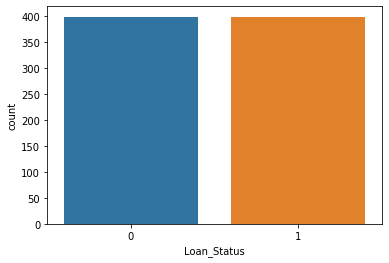

In [98]:
sns.countplot(y)

We have balanced the Loan Status data

# Finding the Random States

In [99]:
maxAcc=0
maxRSs=0
for i in range(1,250):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(train_x,train_y)
    rf_pred=rf.predict(test_x)
    accu=accuracy_score(test_y,rf_pred)
    if accu>maxAcc:
        maxAcc=accu
        maxRSs=i
print("Accuracy is",maxAcc,"On Random State",maxRSs)

Accuracy is 0.8619246861924686 On Random State 249


249 is our best random states we have got, let's proceed with that

# Model Building

In [100]:
train_x.shape

(557, 11)

In [101]:
test_x.shape

(239, 11)

In [102]:
train_y.shape

(557,)

In [103]:
test_y.shape

(239,)

# Logistic Regression

In [104]:
lg=LogisticRegression()
lg.fit(train_x,train_y)

LogisticRegression()

In [105]:
lg_pred=lg.predict(test_x)
print("Predicted value:\n",lg_pred)

Predicted value:
 [0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1
 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1
 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0
 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1]


In [106]:
print("Accuracy Score is:",accuracy_score(test_y,lg_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,lg_pred),"\n")
print("Classification Report is\n",classification_report(test_y,lg_pred))

Accuracy Score is: 0.7405857740585774 

Confusion Matrix is:
 [[ 75  50]
 [ 12 102]] 

Classification Report is
               precision    recall  f1-score   support

           0       0.86      0.60      0.71       125
           1       0.67      0.89      0.77       114

    accuracy                           0.74       239
   macro avg       0.77      0.75      0.74       239
weighted avg       0.77      0.74      0.74       239



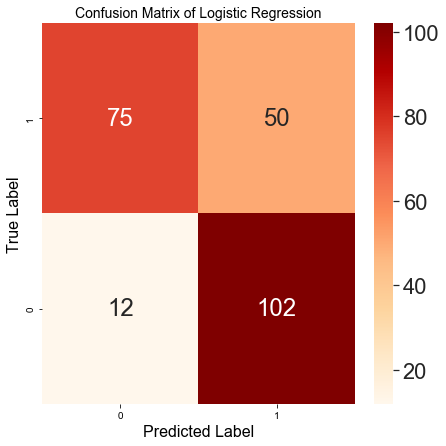

In [107]:
cm=confusion_matrix(test_y,lg_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))
sns.set(font_scale=2.0)
sns.heatmap(cm,xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt=".0f",cmap='OrRd',annot=True,linecolor='black')
plt.xlabel("Predicted Label",fontsize=16)
plt.ylabel("True Label",fontsize=16)
plt.title("Confusion Matrix of Logistic Regression",fontsize=14)
plt.show()

# Decision Tree Classifier

In [108]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)

DecisionTreeClassifier()

In [109]:
dtc_pred=dtc.predict(test_x)
print("Predicted value:\n",dtc_pred)

Predicted value:
 [0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1
 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1
 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0
 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1]


In [110]:
print("Accuracy Score is:",accuracy_score(test_y,dtc_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,dtc_pred),"\n")
print("Classification Report is\n",classification_report(test_y,dtc_pred))

Accuracy Score is: 0.7405857740585774 

Confusion Matrix is:
 [[99 26]
 [36 78]] 

Classification Report is
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       125
           1       0.75      0.68      0.72       114

    accuracy                           0.74       239
   macro avg       0.74      0.74      0.74       239
weighted avg       0.74      0.74      0.74       239



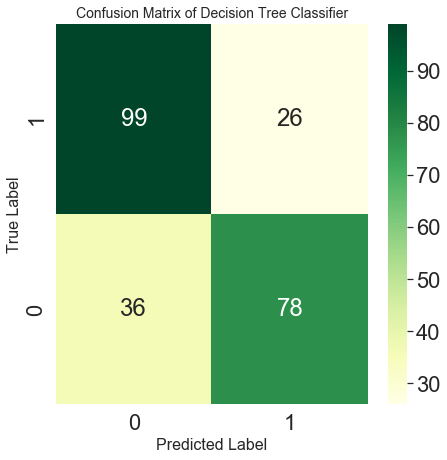

In [111]:
cm=confusion_matrix(test_y,dtc_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))
sns.set(font_scale=2.0)
sns.heatmap(cm,xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt=".0f",cmap='YlGn',annot=True,linecolor='black')
plt.xlabel("Predicted Label",fontsize=16)
plt.ylabel("True Label",fontsize=16)
plt.title("Confusion Matrix of Decision Tree Classifier",fontsize=14)
plt.show()

# Random Forest Classifier

In [112]:
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)

RandomForestClassifier()

In [113]:
rfc_pred=rfc.predict(test_x)
print("Predicted value:\n",rfc_pred)

Predicted value:
 [0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1
 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1
 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1]


In [114]:
print("Accuracy Score is:",accuracy_score(test_y,rfc_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,rfc_pred),"\n")
print("Classification Report is\n",classification_report(test_y,rfc_pred))

Accuracy Score is: 0.8661087866108786 

Confusion Matrix is:
 [[102  23]
 [  9 105]] 

Classification Report is
               precision    recall  f1-score   support

           0       0.92      0.82      0.86       125
           1       0.82      0.92      0.87       114

    accuracy                           0.87       239
   macro avg       0.87      0.87      0.87       239
weighted avg       0.87      0.87      0.87       239



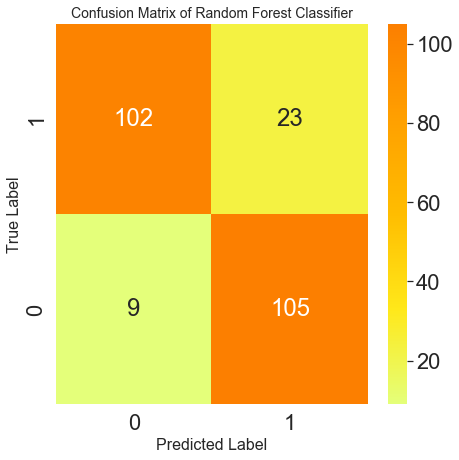

In [115]:
cm=confusion_matrix(test_y,rfc_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))
sns.set(font_scale=2.0)
sns.heatmap(cm,xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt=".0f",cmap='Wistia',annot=True,linecolor='black')
plt.xlabel("Predicted Label",fontsize=16)
plt.ylabel("True Label",fontsize=16)
plt.title("Confusion Matrix of Random Forest Classifier",fontsize=14)
plt.show()

# Support Vector Classifier

In [116]:
svc=SVC(kernel='linear')
svc.fit(train_x,train_y)

SVC(kernel='linear')

In [117]:
svc_pred=svc.predict(test_x)
print("Predicted value:\n",svc_pred)

Predicted value:
 [0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1
 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0
 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1]


In [118]:
print("Accuracy Score is:",accuracy_score(test_y,svc_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,svc_pred),"\n")
print("Classification Report is\n",classification_report(test_y,svc_pred))

Accuracy Score is: 0.7489539748953975 

Confusion Matrix is:
 [[ 67  58]
 [  2 112]] 

Classification Report is
               precision    recall  f1-score   support

           0       0.97      0.54      0.69       125
           1       0.66      0.98      0.79       114

    accuracy                           0.75       239
   macro avg       0.81      0.76      0.74       239
weighted avg       0.82      0.75      0.74       239



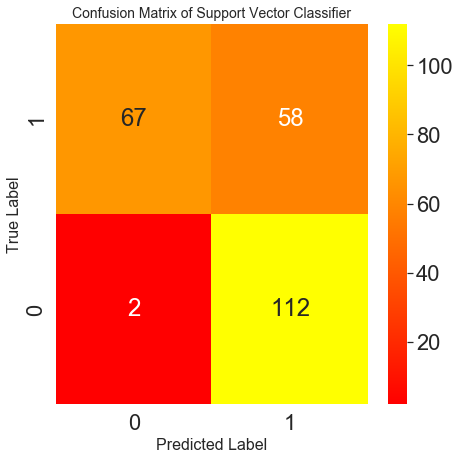

In [119]:
cm=confusion_matrix(test_y,svc_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))
sns.set(font_scale=2.0)
sns.heatmap(cm,xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt=".0f",cmap='autumn',annot=True,linecolor='black')
plt.xlabel("Predicted Label",fontsize=16)
plt.ylabel("True Label",fontsize=16)
plt.title("Confusion Matrix of Support Vector Classifier",fontsize=14)
plt.show()

# KNeighborsClassifier

In [120]:
knn=KNeighborsClassifier()
knn.fit(train_x,train_y)

KNeighborsClassifier()

In [121]:
knn_pred=knn.predict(test_x)
print("Predicted value:\n",knn_pred)

Predicted value:
 [0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1
 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [122]:
print("Accuracy Score is:",accuracy_score(test_y,knn_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,knn_pred),"\n")
print("Classification Report is\n",classification_report(test_y,knn_pred))

Accuracy Score is: 0.7405857740585774 

Confusion Matrix is:
 [[95 30]
 [32 82]] 

Classification Report is
               precision    recall  f1-score   support

           0       0.75      0.76      0.75       125
           1       0.73      0.72      0.73       114

    accuracy                           0.74       239
   macro avg       0.74      0.74      0.74       239
weighted avg       0.74      0.74      0.74       239



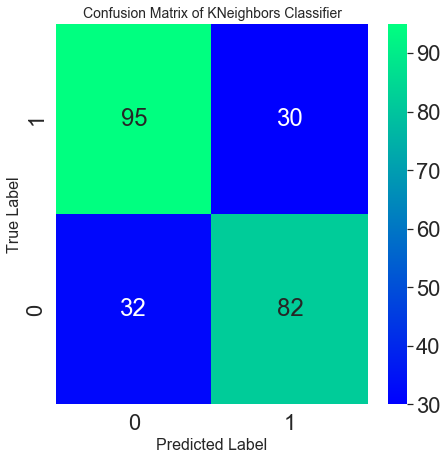

In [123]:
cm=confusion_matrix(test_y,knn_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))
sns.set(font_scale=2.0)
sns.heatmap(cm,xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt=".0f",cmap='winter',annot=True,linecolor='black')
plt.xlabel("Predicted Label",fontsize=16)
plt.ylabel("True Label",fontsize=16)
plt.title("Confusion Matrix of KNeighbors Classifier",fontsize=14)
plt.show()

# Principle Component Analysis

In [124]:
pca=PCA(n_components=8)
pca.fit(train_x,train_y)

PCA(n_components=8)

In [125]:
pca.explained_variance_

array([2.74417404e+03, 1.48406978e+00, 1.19850747e+00, 9.28216088e-01,
       6.14334143e-01, 3.06422770e-01, 2.00946356e-01, 1.54055878e-01])

In [126]:
pca.components_

array([[ 8.94302285e-04,  1.28125123e-03,  1.81469328e-03,
         9.83218102e-04, -9.64313555e-05,  3.70438308e-04,
         1.14615276e-03, -8.91722068e-04, -9.99995412e-01,
        -4.68218435e-04,  4.63979726e-06],
       [ 9.35992333e-03,  8.50708726e-02, -6.16926555e-02,
         5.93502288e-02, -3.71386486e-02, -7.42100777e-01,
         5.25919987e-01, -3.95668385e-01,  7.52660278e-04,
        -9.85414181e-03, -3.32995175e-03],
       [-1.31428828e-01, -1.98646010e-01, -1.73472772e-01,
         2.04577039e-02, -1.42985256e-02, -9.93845459e-02,
        -6.47772826e-01, -6.89589174e-01, -8.27124822e-04,
        -4.64894790e-03,  8.66487753e-02],
       [ 6.99439402e-02,  1.63910321e-01,  9.55900215e-01,
         4.97077366e-02,  1.50001113e-02, -8.19449831e-02,
        -1.44856313e-01, -1.45115083e-01,  1.99327054e-03,
        -1.14000930e-02,  5.39399036e-02],
       [ 3.10079261e-02,  5.74945092e-02, -4.64418681e-02,
        -5.55661996e-02,  3.88177243e-04,  1.46728381e-02,
  

# Ada Boost Classifier

In [127]:
ada=AdaBoostClassifier()
ada.fit(train_x,train_y)

AdaBoostClassifier()

In [128]:
ada_pred=ada.predict(test_x)
print("Predicted value:\n",ada_pred)

Predicted value:
 [0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1
 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0
 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0
 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1]


In [129]:
print("Accuracy Score is:",accuracy_score(test_y,ada_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,ada_pred),"\n")
print("Classification Report is\n",classification_report(test_y,ada_pred))

Accuracy Score is: 0.7280334728033473 

Confusion Matrix is:
 [[81 44]
 [21 93]] 

Classification Report is
               precision    recall  f1-score   support

           0       0.79      0.65      0.71       125
           1       0.68      0.82      0.74       114

    accuracy                           0.73       239
   macro avg       0.74      0.73      0.73       239
weighted avg       0.74      0.73      0.73       239



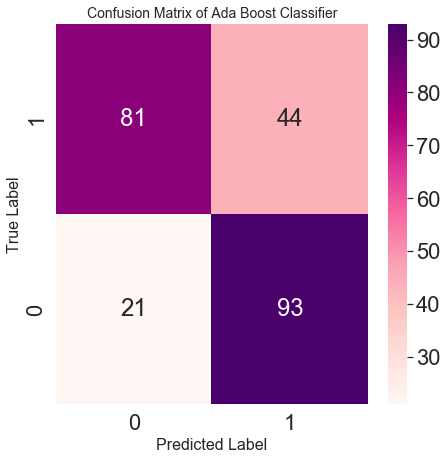

In [130]:
cm=confusion_matrix(test_y,ada_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))
sns.set(font_scale=2.0)
sns.heatmap(cm,xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt=".0f",cmap='RdPu',annot=True,linecolor='black')
plt.xlabel("Predicted Label",fontsize=16)
plt.ylabel("True Label",fontsize=16)
plt.title("Confusion Matrix of Ada Boost Classifier",fontsize=14)
plt.show()

# GradientBoostingClassifier

In [131]:
gbc=GradientBoostingClassifier()
gbc.fit(train_x,train_y)

GradientBoostingClassifier()

In [132]:
gbc_pred=gbc.predict(test_x)
gbc_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [133]:
print("Accuracy Score is:",accuracy_score(test_y,gbc_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,gbc_pred),"\n")
print("Classification Report is\n",classification_report(test_y,gbc_pred))

Accuracy Score is: 0.799163179916318 

Confusion Matrix is:
 [[ 91  34]
 [ 14 100]] 

Classification Report is
               precision    recall  f1-score   support

           0       0.87      0.73      0.79       125
           1       0.75      0.88      0.81       114

    accuracy                           0.80       239
   macro avg       0.81      0.80      0.80       239
weighted avg       0.81      0.80      0.80       239



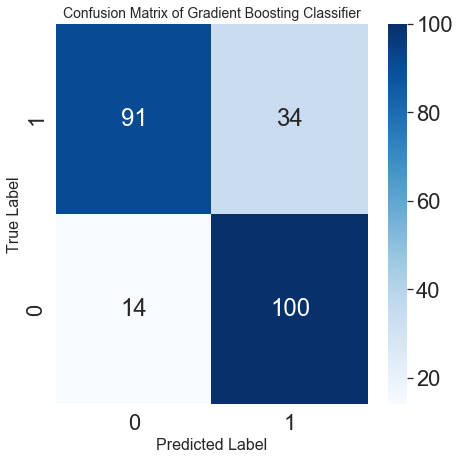

In [134]:
cm=confusion_matrix(test_y,gbc_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))
sns.set(font_scale=2.0)
sns.heatmap(cm,xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt=".0f",cmap='Blues',annot=True,linecolor='black')
plt.xlabel("Predicted Label",fontsize=16)
plt.ylabel("True Label",fontsize=16)
plt.title("Confusion Matrix of Gradient Boosting Classifier",fontsize=14)
plt.show()

In [135]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes Model

In [136]:
gnb=GaussianNB()
gnb.fit(train_x,train_y)

GaussianNB()

In [137]:
gnb_pred=gnb.predict(test_x)
print("Predicted value:\n",gnb_pred)

Predicted value:
 [0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0
 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1
 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0
 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1]


In [138]:
print("Accuracy Score is:",accuracy_score(test_y,gnb_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,gnb_pred),"\n")
print("Classification Report is\n",classification_report(test_y,gnb_pred))

Accuracy Score is: 0.7154811715481172 

Confusion Matrix is:
 [[ 67  58]
 [ 10 104]] 

Classification Report is
               precision    recall  f1-score   support

           0       0.87      0.54      0.66       125
           1       0.64      0.91      0.75       114

    accuracy                           0.72       239
   macro avg       0.76      0.72      0.71       239
weighted avg       0.76      0.72      0.71       239



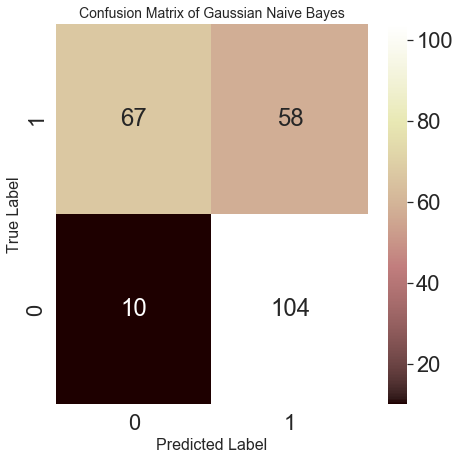

In [139]:
cm=confusion_matrix(test_y,gnb_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))
sns.set(font_scale=2.0)
sns.heatmap(cm,xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt=".0f",cmap='pink',annot=True,linecolor='black')
plt.xlabel("Predicted Label",fontsize=16)
plt.ylabel("True Label",fontsize=16)
plt.title("Confusion Matrix of Gaussian Naive Bayes",fontsize=14)
plt.show()

In [140]:
for clf in (lg,rfc,dtc,svc,gbc,ada,gnb,knn):
    clf.fit(train_x,train_y)
    clf_pred=clf.predict(test_x)
    print(clf.__class__.__name__,accuracy_score(test_y,clf_pred))

LogisticRegression 0.7405857740585774
RandomForestClassifier 0.8661087866108786
DecisionTreeClassifier 0.7364016736401674
SVC 0.7489539748953975
GradientBoostingClassifier 0.803347280334728
AdaBoostClassifier 0.7280334728033473
GaussianNB 0.7154811715481172
KNeighborsClassifier 0.7405857740585774


After analysis of various model we found that Random Forest gives a good accuracy 86%

# Cross Validation Score

In [141]:
print("Cross Validation score for Logistic Regression:",cross_val_score(lg,x,y,cv=10).mean())

Cross Validation score for Logistic Regression: 0.7552531645569619


In [142]:
print("Cross Validation score for Decision Tree Classifier:",cross_val_score(dtc,x,y,cv=10).mean())

Cross Validation score for Decision Tree Classifier: 0.7739240506329115


In [143]:
print("Cross Validation score for Random Forest Classifier:",cross_val_score(rfc,x,y,cv=10).mean())

Cross Validation score for Random Forest Classifier: 0.8193037974683544


In [144]:
print("Cross Validation score for Support Vector Classifier:",cross_val_score(svc,x,y,cv=10).mean())

Cross Validation score for Support Vector Classifier: 0.7401424050632911


In [145]:
print("Cross Validation score for Ada Boost Classifier:",cross_val_score(ada,x,y,cv=10).mean())

Cross Validation score for Ada Boost Classifier: 0.7376740506329114


In [146]:
print("Cross Validation score for Gradient Boosting Classifier:",cross_val_score(gbc,x,y,cv=10).mean())

Cross Validation score for Gradient Boosting Classifier: 0.7766613924050633


In [147]:
print("Cross Validation score for Gaussian Naive Bayes:",cross_val_score(gnb,x,y,cv=10).mean())

Cross Validation score for Gaussian Naive Bayes: 0.7465189873417721


In [148]:
print("Cross Validation score for KNeighbors Classifier:",cross_val_score(knn,x,y,cv=10).mean())

Cross Validation score for KNeighbors Classifier: 0.7575632911392404


Among various model analysis and cross validation, I choose Random Forest Classifier as my final model, it gives a good accuracy 86% and cross validation score 81%

# Hyper Parameter Tuning

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15],
             'n_estimators':[100,200],
             'max_features': ["auto","sqrt","log2"]}

In [151]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameter,cv=5)

In [152]:
grid_search.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [153]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 100}

In [154]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15)

In [155]:
grid_search.best_score_

0.7827541827541827

# Final Model

In [156]:
final_model=RandomForestClassifier(criterion='gini',max_depth=15,max_features='log2',n_estimators=100)

In [157]:
final_model.fit(train_x,train_y)

RandomForestClassifier(max_depth=15, max_features='log2')

In [158]:
final_model_pred=final_model.predict(test_x)
print("Predicted value:",final_model_pred)

Predicted value: [0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1
 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0
 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1
 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1]


In [159]:
print("Accuracy Score is:",accuracy_score(test_y,final_model_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,final_model_pred),"\n")
print("Classification Report is\n",classification_report(test_y,final_model_pred))

Accuracy Score is: 0.8702928870292888 

Confusion Matrix is:
 [[102  23]
 [  8 106]] 

Classification Report is
               precision    recall  f1-score   support

           0       0.93      0.82      0.87       125
           1       0.82      0.93      0.87       114

    accuracy                           0.87       239
   macro avg       0.87      0.87      0.87       239
weighted avg       0.88      0.87      0.87       239



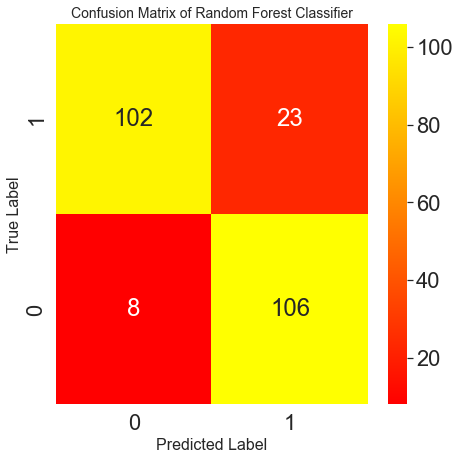

In [160]:
cm=confusion_matrix(test_y,final_model_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))
sns.set(font_scale=2.0)
sns.heatmap(cm,xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt=".0f",cmap='autumn',annot=True,linecolor='black')
plt.xlabel("Predicted Label",fontsize=16)
plt.ylabel("True Label",fontsize=16)
plt.title("Confusion Matrix of Random Forest Classifier",fontsize=14)
plt.show()

After hyper tuning it increase the accuracy score to 87%

# Plotting ROC AUC Curve

In [161]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

In [162]:
y_Prob=final_model.fit(train_x,train_y).predict_proba(test_x)


In [163]:
fpr,tpr,thresholds=roc_curve(test_y,final_model_pred)

In [164]:
fpr

array([0.   , 0.184, 1.   ])

In [165]:
tpr

array([0.        , 0.92982456, 1.        ])

In [166]:
thresholds

array([2, 1, 0])

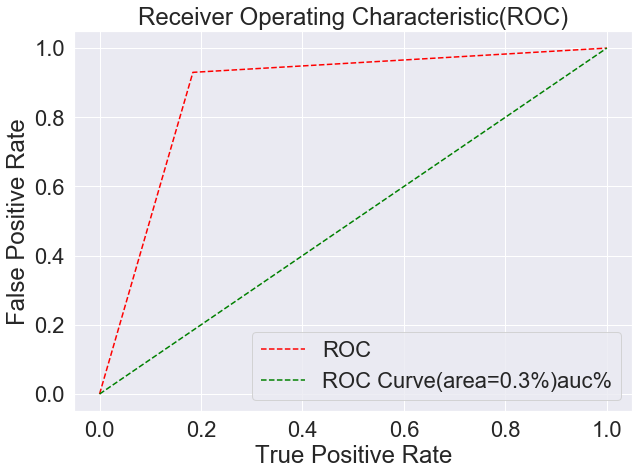

In [167]:
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,color='red',label='ROC',linestyle='--')
plt.plot([0,1],[0,1],color='green',linestyle='--',label='ROC Curve(area=0.3%)auc%')
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("Receiver Operating Characteristic(ROC)")
plt.legend()
plt.show()

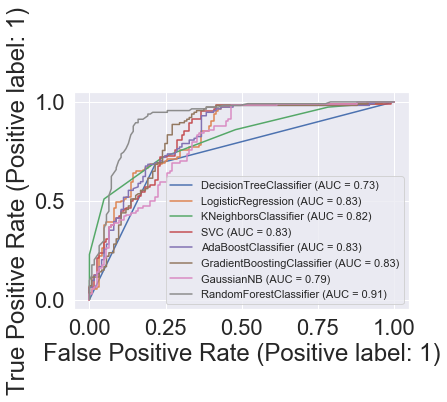

In [168]:

dist=plot_roc_curve(dtc,test_x,test_y)
plot_roc_curve(lg,test_x,test_y,ax=dist.ax_)
plot_roc_curve(knn,test_x,test_y,ax=dist.ax_)
plot_roc_curve(svc,test_x,test_y,ax=dist.ax_)
plot_roc_curve(ada,test_x,test_y,ax=dist.ax_)
plot_roc_curve(gbc,test_x,test_y,ax=dist.ax_)
plot_roc_curve(gnb,test_x,test_y,ax=dist.ax_)
plot_roc_curve(rfc,test_x,test_y,ax=dist.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Saving the Model

In [169]:
import pickle

In [170]:
filename="Loan_status_prediction.pickle"

In [171]:
pickle.dump(final_model,open(filename,'wb'))

In [172]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(test_x)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [173]:
loaded_model.score(test_x,test_y)

0.8577405857740585

In [174]:
df=pd.DataFrame([loaded_model.predict(test_x)[:],test_y[:]],index=["Predicted","Actual"])
df

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted,0,0,0,0,0,1,0,0,0,1,...,0,1,1,1,0,1,1,1,1,1
Actual,0,0,0,0,0,1,0,0,0,1,...,0,1,1,1,0,1,1,1,1,1


In [175]:
df.to_csv("Loan_Status_Prediction.csv")

Here is the actual and predicted value, The value almost look similar to actual Value

We see that more male applicant are applied for loan, those who are educated, not self employeed, high income, living in semi urban area, having credit history 1.0 are high chance of getting the loan.